# Regression task: diabetes

We use scikit-learn to load and preprocess the diabetes data.

In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X.shape, y.shape

((442, 10), (442,))

X Columns

age

sex

bmi

map

tc

ldl

hdl

tch

ltg

glu

In [3]:
X[:10]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665645,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02269202, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187235,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03199144, -0.04664087],
       [-0.09269548, -0.04464164, -0.04069594, -0.01944209, -0.06899065,
        -0.07928784,  0.04127682, -0.0763945 , -0.04118039, -0.09634616],
       [-0.04547248,  0.05068012, -0.04716281, -0.01599922, -0.04009564,
        -0.02480001,  0.00077881, -0.03949338

In [4]:
y[:10]

array([ 151.,   75.,  141.,  206.,  135.,   97.,  138.,   63.,  110.,  310.])

In [5]:
# Important: get the target into correct shape for Keras
y = y.reshape(-1,1)
y.shape

(442, 1)

In [6]:
y[:5,:]

array([[ 151.],
       [  75.],
       [ 141.],
       [ 206.],
       [ 135.]])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# some housekeeping
input_dim = X_train.shape[1]
output_dim = 1 # for regression

### Hyperparameters

In [9]:
learning_rate = 0.025
num_epochs = 100

### Define the model

In [10]:
model = Sequential()

model.add(Dense(units = 32, input_dim = input_dim, activation = "relu") )
model.add(Dense(units = 32, activation = "relu"))
model.add(Dense(units = 32, activation = "relu")) 
model.add(Dense(units = output_dim, activation = "relu"))           

### Compile model

In [11]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = learning_rate))

In [12]:
# number of parameters = num. features + bias
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                352       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,497
Trainable params: 2,497
Non-trainable params: 0
_________________________________________________________________


### Fit the model

In [13]:
# we keep the losses in the history object, for later plotting
history = model.fit(X_train, y_train, epochs = num_epochs, validation_split = 0.2, callbacks = [EarlyStopping(patience=2)])

Train on 282 samples, validate on 71 samples
Epoch 1/100
282/282 [==============================] - 0s - loss: 25477.4382 - val_loss: 16723.0199
Epoch 2/100
282/282 [==============================] - 0s - loss: 8375.4370 - val_loss: 4487.3889
Epoch 3/100
282/282 [==============================] - 0s - loss: 4441.5113 - val_loss: 4855.8411
Epoch 4/100
282/282 [==============================] - 0s - loss: 3645.0950 - val_loss: 3853.7601
Epoch 5/100
282/282 [==============================] - 0s - loss: 3291.8550 - val_loss: 3352.3783
Epoch 6/100
282/282 [==============================] - 0s - loss: 2921.5783 - val_loss: 3152.3024
Epoch 7/100
282/282 [==============================] - 0s - loss: 2824.3119 - val_loss: 3202.5041
Epoch 8/100
282/282 [==============================] - 0s - loss: 2857.3792 - val_loss: 2999.8966
Epoch 9/100
282/282 [==============================] - 0s - loss: 2863.3264 - val_loss: 2893.9267
Epoch 10/100
282/282 [==============================] - 0s - loss: 2942

### Evaluation on training set and test set

In [14]:
train_score = model.evaluate(X_train, y_train)
test_score = model.evaluate(X_test, y_test)

print("\n\nTraining cost: ", "{:.4f}".format(train_score))
print("\nTest cost: ", "{:.4f}".format(test_score))

32/89 [=========>....................] - ETA: 0s0s

Training cost:  2870.6825

Test cost:  3498.4428


### Plot loss history

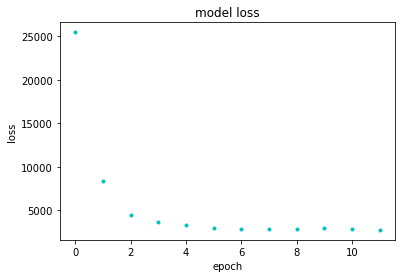

In [15]:
plt.plot(history.history['loss'], 'c.')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

### Get predictions

In [16]:
# predictions are obtained using predict()
pred_train = model.predict(X_train)
pred_train[:10]

array([[ 136.22280884],
       [ 101.8901825 ],
       [ 110.09208679],
       [  67.08953857],
       [ 130.92832947],
       [ 117.92019653],
       [  99.56243896],
       [ 216.3052063 ],
       [ 206.66717529],
       [ 119.0118866 ]], dtype=float32)

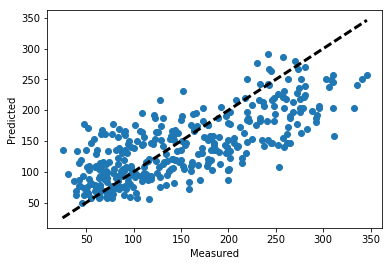

In [17]:
pred_train = model.predict(X_train)
fig, ax = plt.subplots()
ax.scatter(y_train, pred_train)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

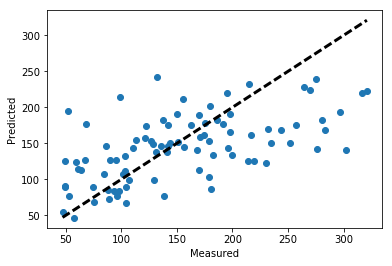

In [18]:
pred_test = model.predict(X_test)
fig, ax = plt.subplots()
ax.scatter(y_test, pred_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()